In [1]:
# Before Having a deep dive into the Data, Importing Modules


import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#                    Happiness Level of Countries by Regions in Years




## Contents
1. Introduction
2. The Aim of Analysis
3. General Information of the Data
4. Arrangements of the Data Sets
   4.a)Exploring Null Values
5. Cleaning of the Row Data 
6. Data Exploration 
7. Feature Engineering
8. Results
9. Conclusions and Further Research


## 1. Introduction 

Happiness can be come through many factors such as income, freedom or relationships and more. While sharing the same world together, this study will show whether all of us are happy or not, with providing scientific conclusions via using main factors.

This study is based on The World Happiness Report which was published 2012, 2013,2015 and 2016 aiming to demostrate global happiness.


## 2. The Aim of Analysis

Study will search Happiness_Score by examining 9 main factors based on 166 countries;
'Country','Region',','Economy_GDP_per_Capita','Family','Health_Life_Expectancy','Freedom','Trust_Government_Corruption','Generosity', 'Dystopia_Residual'. 

Data will show how happiness score explains personal and national variations in happiness.  


## 3. General Information of the Data

We have 3 different data sets that rely on 2015, 2016, 2017's surveys. 

Columns:
Country:                       Name of the country.

Region:                        Region the country belongs to.

Happiness Rank:                Rank of the country based on the Happiness Score.

Happiness Score:               A metric measured in 2015 by asking the sampled people the question: "How would you rate your                                  happiness on a scale of 0 to 10 where 10 is the happiest."

Standard Error:                The standard error of the happiness score.

Economy (GDP per Capita):      The extent to which GDP contributes to the calculation of the Happiness Score. 

Family:                        The extent to which Family contributes to the calculation of the Happiness Score

Health (Life Expectancy):      The extent to which Life expectancy contributed to the calculation of the Happiness Score

Freedom:                       The extent to which Freedom contributed to the calculation of the Happiness Score.

Trust (Government Corruption): The extent to which Perception of Corruption contributes to Happiness Score.

Generosity:                    The extent to which Generosity contributed to the calculation of the Happiness Score.

Dystopia Residual:             The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.
(Dystopia is an imaginary country where most unhappy people live. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. “Dystopia” was created in contrast to Utopia.)


## 4. Arrangements of the Data Sets

In [2]:
df2015 = pd.read_csv("data/2015.csv")
df2016 = pd.read_csv("data/2016.csv")
df2017 = pd.read_csv("data/2017.csv")

In [3]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 13.6+ KB


In [4]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 14.8+ KB


In [5]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.0+ KB


Above, we see general information of data sets which gives different data sizes.

In [6]:
print(df2015.columns, df2016.columns, df2017.columns, sep = " \n" )

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In order to arrange our data frame, some columns have been removed from each data set. 

In [7]:
#'Standard Error' column has been deleted from 2015 data. 


df2015 = df2015.drop('Standard Error', axis=1)

In [8]:
# New column names have been amended to the data set. 

df2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption','Generosity', 'Dystopia_Residual']

In [9]:
df2015["Year"] = 2015

In [10]:
df2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [11]:
#'Upper Confidence Interval' and 'Lower Confidence Interval' column have been deleted from 2016 data set. 


df2016 = df2016.drop(['Upper Confidence Interval','Lower Confidence Interval'], axis =1 )

In [12]:
# New column names have been amended to the data set. 


df2016.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption','Generosity', 'Dystopia_Residual']

In [13]:
df2016["Year"] = 2016

In [14]:
df2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [15]:
#'Whisker.high' and 'Whisker.low' column have been deleted from 2017 data set. 


df2017 =  df2017.drop(['Whisker.high','Whisker.low'],axis =1 )

In [16]:
# New column names have been amended to the data set. 


df2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual']

In [17]:
df2017["Year"] = 2017

In [18]:
df2017.head()

,Country,Happiness_Rank,Happiness_Score,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Generosity,Trust_Government_Corruption,Dystopia_Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [19]:
print(df2015.columns, df2016.columns, df2017.columns, sep = " \n" )

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual',
       'Year'],
      dtype='object') 
Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual',
       'Year'],
      dtype='object') 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Generosity', 'Trust_Government_Corruption', 'Dystopia_Residual',
       'Year'],
      dtype='object')


Creating a New data Framed called Hapiness_report by collating 3 data sets; df2015, df2016, df2017 

In [20]:
frames = [df2015, df2016, df2017]

Hapiness_report = pd.concat(frames,sort=True,ignore_index=True)
Hapiness_report

,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
0,Switzerland,2.517380,1.396510,1.349510,0.665570,0.296780,1,7.587,0.941430,Western Europe,0.419780,2015
1,Iceland,2.702010,1.302320,1.402230,0.628770,0.436300,2,7.561,0.947840,Western Europe,0.141450,2015
2,Denmark,2.492040,1.325480,1.360580,0.649380,0.341390,3,7.527,0.874640,Western Europe,0.483570,2015
3,Norway,2.465310,1.459000,1.330950,0.669730,0.346990,4,7.522,0.885210,Western Europe,0.365030,2015
4,Canada,2.451760,1.326290,1.322610,0.632970,0.458110,5,7.427,0.905630,North America,0.329570,2015
5,Finland,2.619550,1.290250,1.318260,0.641690,0.233510,6,7.406,0.889110,Western Europe,0.413720,2015
6,Netherlands,2.465700,1.329440,1.280170,0.615760,0.476100,7,7.378,0.892840,Western Europe,0.318140,2015
7,Sweden,2.371190,1.331710,1.289070,0.659800,0.362620,8,7.364,0.910870,Western Europe,0.438440,2015
8,New Zealand,2.264250,1.250180,1.319670,0.639380,0.475010,9,7.286,0.908370,Australia and New Zealand,0.429220,2015
9,Australia,2.266460,1.333580,1.309230,0.651240,0.435620,10,7.284,0.931560,Australia and New Zealand,0.356370,2015


### 4.a)Exploring Null Values

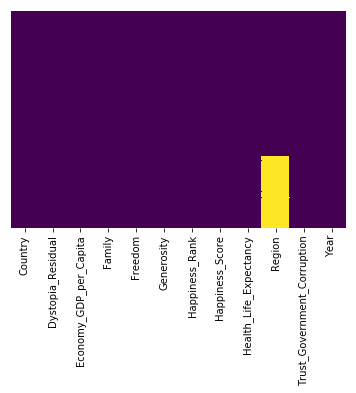

In [21]:
sns.heatmap(Hapiness_report.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [22]:
Sum = Hapiness_report.isnull().sum()
Percentage = ( Hapiness_report.isnull().sum()/Hapiness_report.isnull().count() )

In [23]:
Null_Values = pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])
Null_Values

,Sum,Percentage
Country,0,0.000000
Dystopia_Residual,0,0.000000
Economy_GDP_per_Capita,0,0.000000
Family,0,0.000000
Freedom,0,0.000000
Generosity,0,0.000000
Happiness_Rank,0,0.000000
Happiness_Score,0,0.000000
Health_Life_Expectancy,0,0.000000
Region,155,0.329787


We only have missing values in Region Column 

## 5. Cleaning of the Row Data

In [95]:
Happiness_report2 = Hapiness_report.copy()

In [25]:
Happiness_report2.to_csv("Happiness_reportSON.csv")

In [96]:
try:
    for country in Happiness_report2.Country.unique():
        Happiness_report2.loc[Happiness_report2['Country']==str(country),'Region']=Happiness_report2[Happiness_report2['Country']==str(country)].Region.mode()[0]
except IndexError:
    pass

In [97]:
Happiness_report2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 12 columns):
Country                        470 non-null object
Dystopia_Residual              470 non-null float64
Economy_GDP_per_Capita         470 non-null float64
Family                         470 non-null float64
Freedom                        470 non-null float64
Generosity                     470 non-null float64
Happiness_Rank                 470 non-null int64
Happiness_Score                470 non-null float64
Health_Life_Expectancy         470 non-null float64
Region                         468 non-null object
Trust_Government_Corruption    470 non-null float64
Year                           470 non-null int64
dtypes: float64(8), int64(2), object(2)
memory usage: 40.4+ KB


After filling missing values in Region Column by Mode function, we do still have 2 more missing values. 

In [98]:
#Lets have a look at the countries which do not have region information in the data set.


Happiness_report2[Happiness_report2['Region'].isna()]

,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
347,Taiwan Province of China,2.126607,1.433627,1.384565,0.361467,0.258360,33,6.422,0.793984,NaN,0.063829,2017
385,"Hong Kong S.A.R., China",0.554633,1.551675,1.262791,0.490969,0.374466,71,5.472,0.943062,NaN,0.293934,2017


In [99]:
#Lets check if China exsists in the previous rows. 


Happiness_report2[Happiness_report2.Country == "China"]

,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
83,China,1.860400,0.890120,0.946750,0.516970,0.081850,84,5.140,0.816580,Eastern Asia,0.027810,2015
240,China,2.170870,1.027800,0.793810,0.440120,0.049590,83,5.245,0.735610,Eastern Asia,0.027450,2016
393,China,1.764939,1.081166,1.160837,0.472788,0.028807,79,5.273,0.741416,Eastern Asia,0.022794,2017


As having China in Country column as Eastern Asia region, we will assign Eastern Asia manually into the 'Region Column'. 

In [100]:
Happiness_report2.loc[347,'Region'] = "Eastern Asia"

In [101]:
Happiness_report2.loc[385,'Region'] = "Eastern Asia"

In [102]:
Happiness_report2.loc[385]

Country                        Hong Kong S.A.R., China
Dystopia_Residual                             0.554633
Economy_GDP_per_Capita                         1.55167
Family                                         1.26279
Freedom                                       0.490969
Generosity                                    0.374466
Happiness_Rank                                      71
Happiness_Score                                  5.472
Health_Life_Expectancy                        0.943062
Region                                    Eastern Asia
Trust_Government_Corruption                   0.293934
Year                                              2017
Name: 385, dtype: object

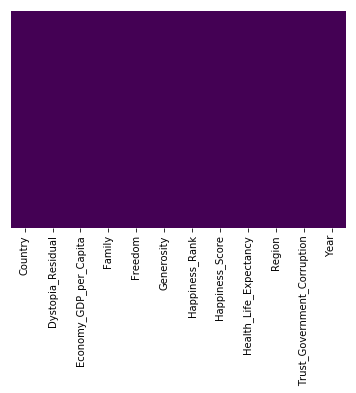

In [104]:
sns.heatmap(Happiness_report2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Now we have all values filled in to the data set. 

Than, have a quick look at corelations between variables.

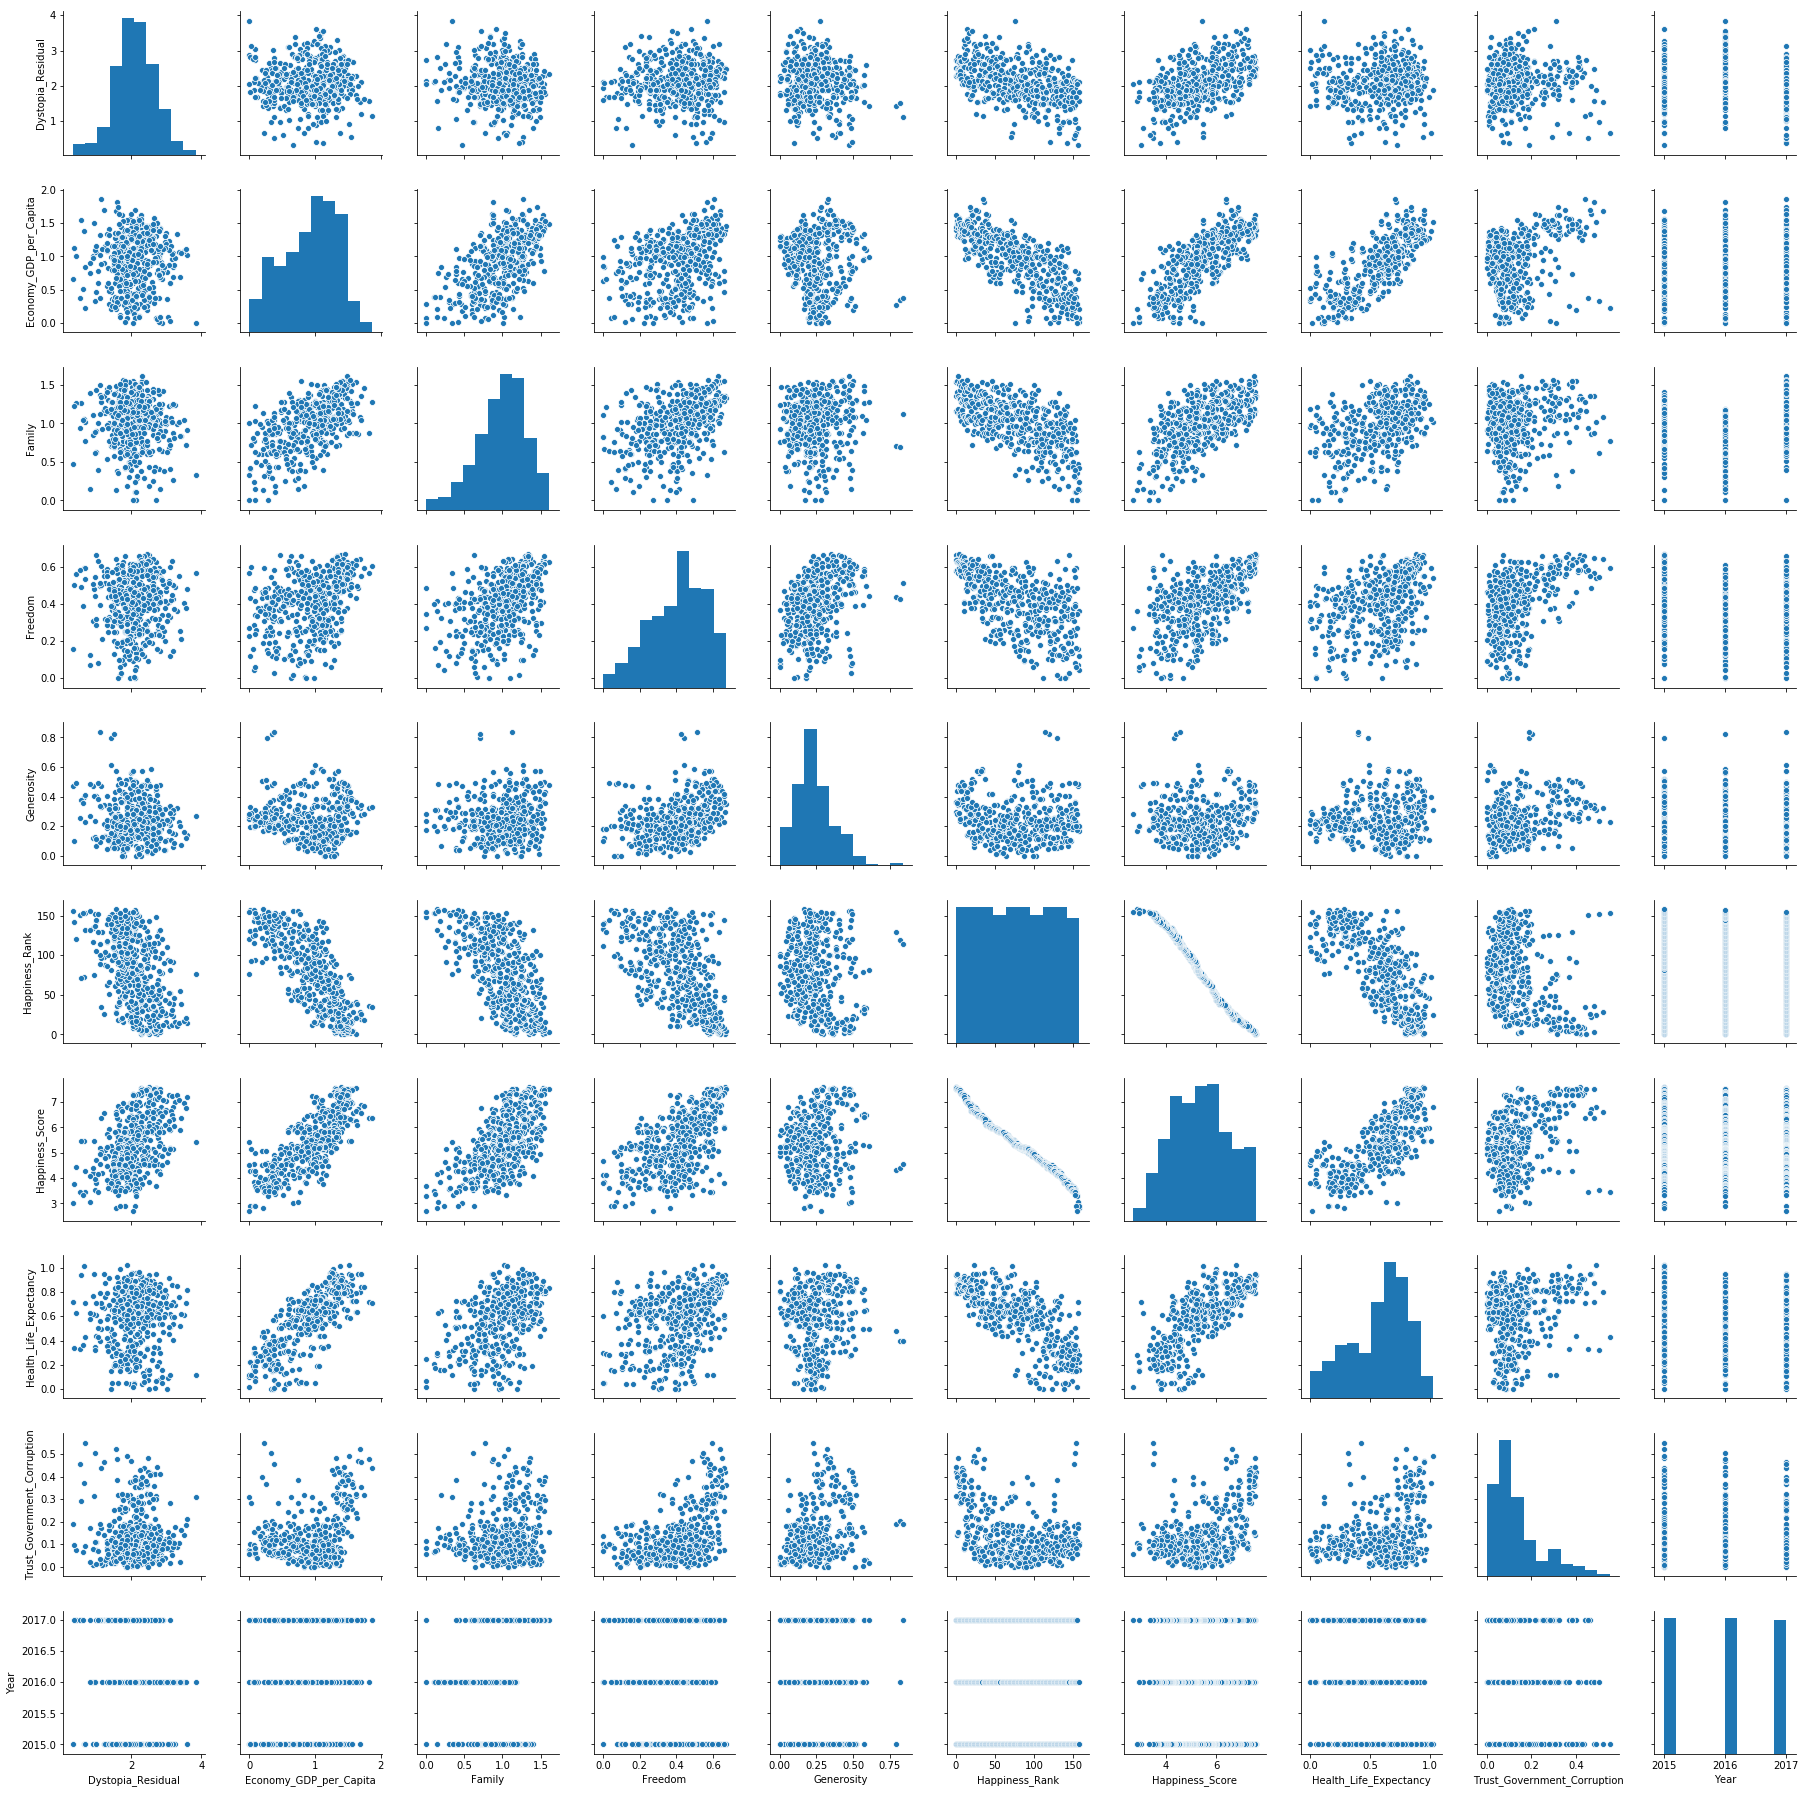

In [105]:
sns.pairplot(Happiness_report2)

Apperantly, some variabes have positive relations with each other. Lets search for more details.

Distribution of Variables 

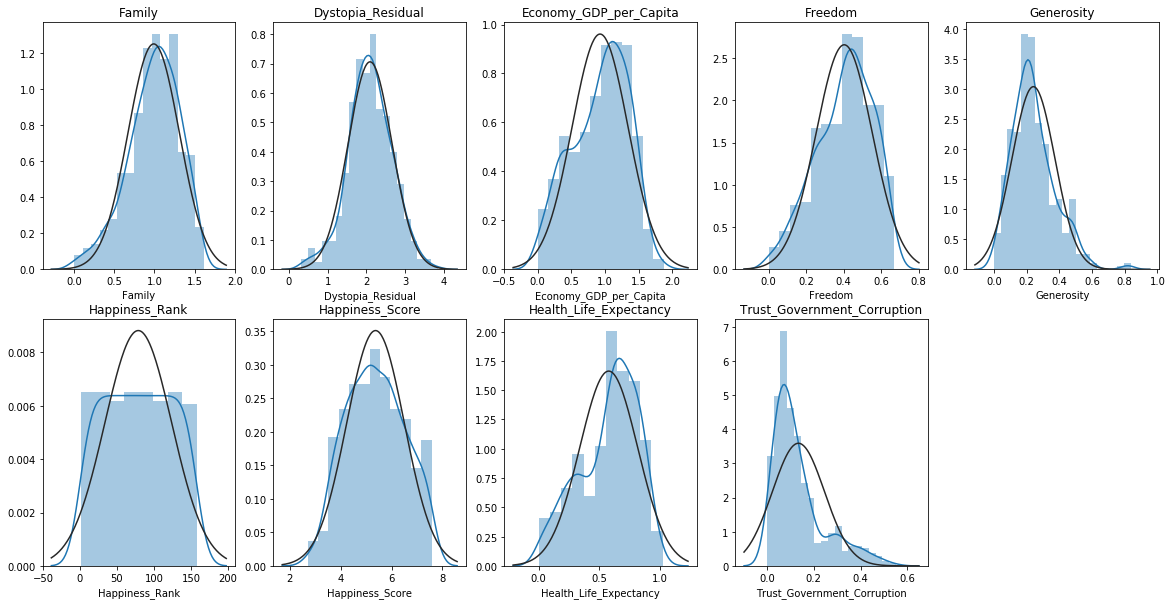

In [106]:
from scipy.stats import norm 


plt.figure(figsize = (20,10)) 

plt.subplot(2,5,1)
sns.distplot(Happiness_report2["Family"],fit=norm) 
plt.title("Family")

plt.subplot(2,5,2)
sns.distplot(Happiness_report2["Dystopia_Residual"],fit=norm)
plt.title("Dystopia_Residual")

plt.subplot(2,5,3)
sns.distplot(Happiness_report2["Economy_GDP_per_Capita"], fit=norm)
plt.title("Economy_GDP_per_Capita")

plt.subplot(2,5,4)
sns.distplot(Happiness_report2["Freedom"], fit=norm)
plt.title("Freedom")

plt.subplot(2,5,5)
sns.distplot(Happiness_report2["Generosity"],fit=norm)
plt.title("Generosity")

plt.subplot(2,5,6)
sns.distplot(Happiness_report2["Happiness_Rank"], fit=norm)
plt.title("Happiness_Rank")

plt.subplot(2,5,7)
sns.distplot(Happiness_report2["Happiness_Score"], fit=norm)
plt.title("Happiness_Score")

plt.subplot(2,5,8)
sns.distplot(Happiness_report2["Health_Life_Expectancy"], fit=norm)
plt.title("Health_Life_Expectancy")

plt.subplot(2,5,9)
sns.distplot(Happiness_report2["Trust_Government_Corruption"], fit=norm)
plt.title("Trust_Government_Corruption")



plt.show()

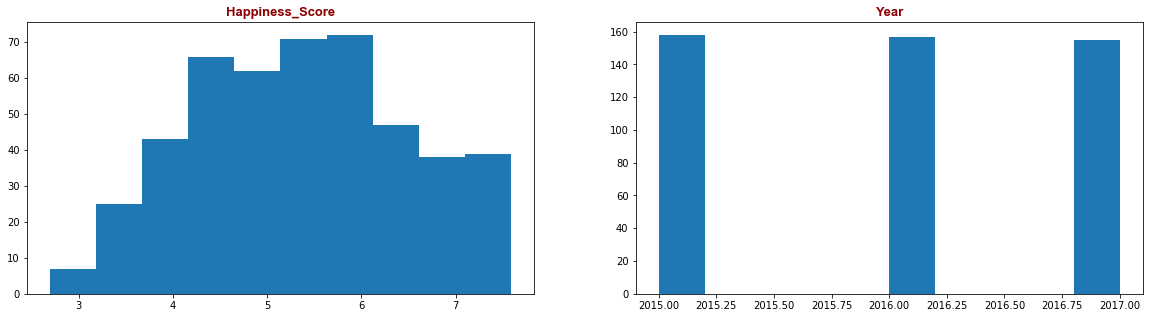

In [107]:
plt.figure(figsize=(20,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }

degiskenler = ['Happiness_Score' ,'Year']

for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(Happiness_report2[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)

In [113]:
mean_by_year = Happiness_report2.groupby(by="Year").mean()["Happiness_Score"] 
print(mean_by_year[2015])
print(mean_by_year[2016])
print(mean_by_year[2017] )#2017de azalmis

5.3757341772151905
5.382184713375795
5.354019355773926


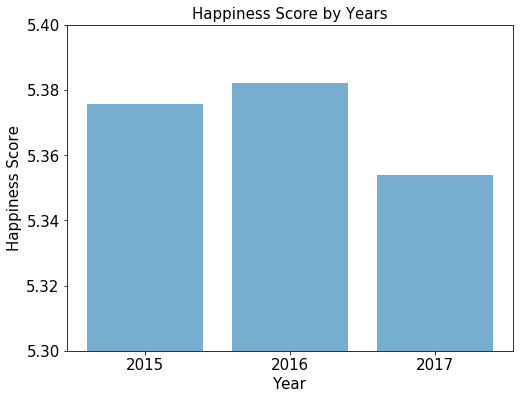

In [41]:
plt.figure(figsize = (8,6))

objects = ('2015','2016','2017')
y_pos = np.arange(len(objects)) # y_pos kac tane object varsa o kdrlik bir array olusturuyor. Bar plot altina isimlerini yazar
performance =[mean_by_year[2015], mean_by_year[2016], mean_by_year[2017]]
 
plt.bar(y_pos, performance, align='center', alpha=0.6)
plt.yticks(size=15)
plt.xticks(y_pos, objects,size=15)
plt.xlabel('Year',size=15)
plt.ylabel('Happiness Score',size=15)
plt.title('Happiness Score by Years', fontsize=15)

plt.ylim(5.30,5.40)

plt.show()

In [42]:
mean_by_year_and_region = Happiness_report2.groupby(by=["Region", "Year"]).mean()["Happiness_Score"]

In [43]:
mean_by_year_and_region=mean_by_year_and_region.reset_index()

In [44]:
mean_by_year_and_region

,Region,Year,Happiness_Score
0,Australia and New Zealand,2015,7.285000
1,Australia and New Zealand,2016,7.323500
2,Australia and New Zealand,2017,7.299000
3,Central and Eastern Europe,2015,5.332931
4,Central and Eastern Europe,2016,5.370690
5,Central and Eastern Europe,2017,5.409931
6,Eastern Asia,2015,5.626167
7,Eastern Asia,2016,5.624167
8,Eastern Asia,2017,5.646667
9,Latin America and Caribbean,2015,6.144682


(0, 10)

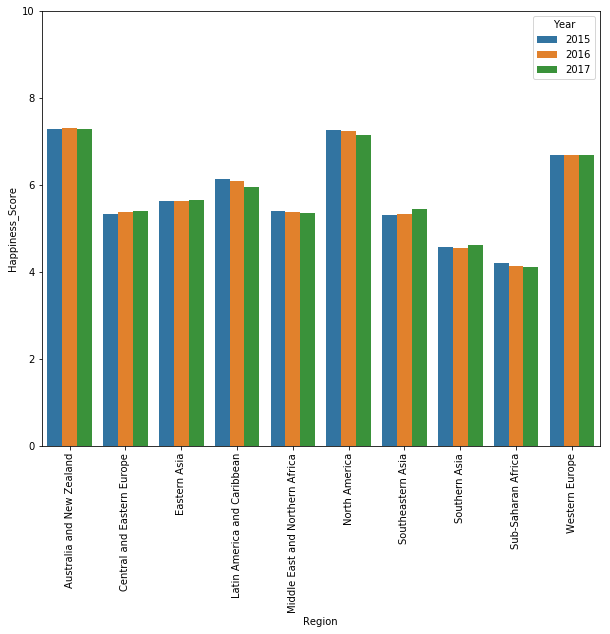

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x="Region", y="Happiness_Score", hue="Year", data=mean_by_year_and_region)
plt.xticks(rotation=90)
plt.ylim((0,10))

In [115]:
years_Turkey = Happiness_report2[Happiness_report2.Country == 'Turkey']['Year']

In [116]:
Happiness_Score_Turkey = Happiness_report2[Happiness_report2.Country == 'Turkey']['Happiness_Score']

In [117]:
Dystopia_Residual_Turkey = Happiness_report2[Happiness_report2.Country == 'Turkey']['Dystopia_Residual']

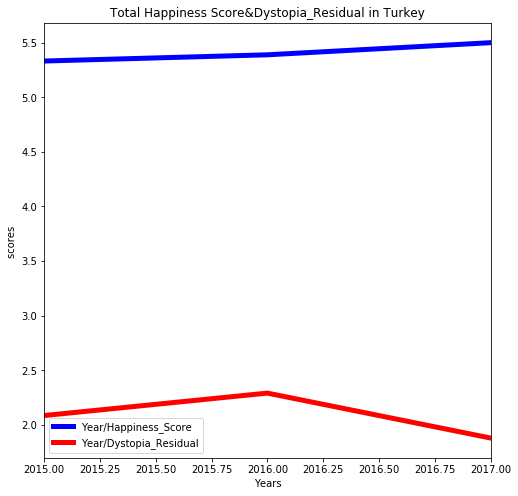

In [119]:
plt.figure(1, figsize = (8,8))
plt.plot(years_Turkey, Happiness_Score_Turkey, label = 'Year/Happiness_Score', color='blue', linewidth=5)
plt.plot(years_Turkey,Dystopia_Residual_Turkey, label = 'Year/Dystopia_Residual',color='red', linewidth=5)
plt.xlabel('Years')
plt.ylabel('scores ')
plt.xlim([2015, 2017])
plt.title('Total Happiness Score&Dystopia_Residual in Turkey')
plt.legend()
plt.show()

Text(0, 0.5, 'Happiness_Score')

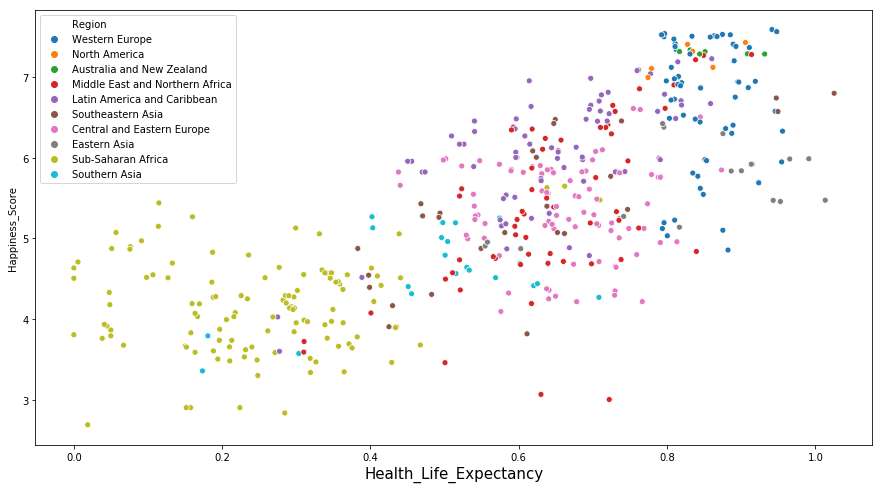

In [50]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Health_Life_Expectancy', y='Happiness_Score', hue='Region',data=Happiness_report2);
plt.xlabel('Health_Life_Expectancy',size=15)
plt.ylabel('Happiness_Score', size =10)

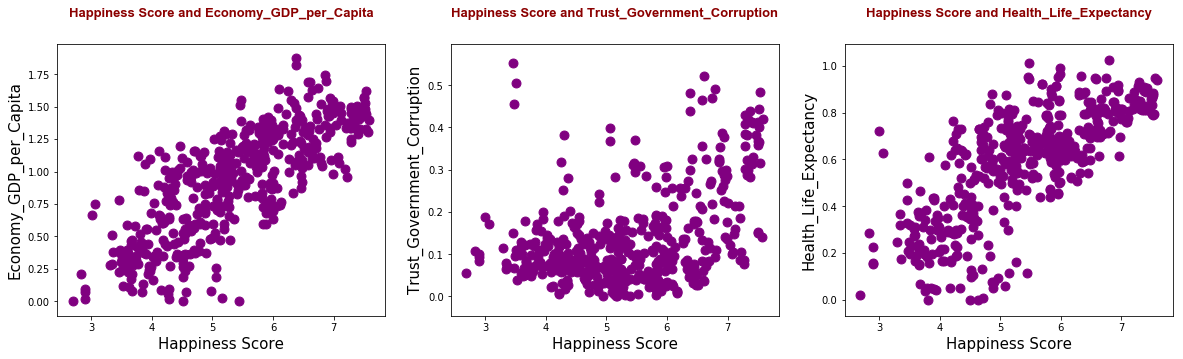

In [123]:
# 3 DEGISKEN ILE HAPPINESS SCORE ILISKISINE BAKALIM 


fig, axes = plt.subplots(1,3,figsize=(20,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }

happiness_score_by_three_variables = ['Economy_GDP_per_Capita','Trust_Government_Corruption', 'Health_Life_Expectancy'] 
 
for i in range(0,3):
    
    plt.subplot(1, 3, i+1)
    plt.scatter(Happiness_report2['Happiness_Score'],Happiness_report2[happiness_score_by_three_variables[i]],c='purple', s=80)
    plt.title('Happiness Score and '+ str(happiness_score_by_three_variables[i]), fontdict=baslik_font, fontsize=13, y=1.08)
    plt.xlabel('Happiness Score',size=15)
    plt.ylabel(str(happiness_score_by_three_variables[i]),size=15)

In [52]:
#Korelasyon 

Corr_Matrix = Happiness_report2.corr()
Corr_Matrix

,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Trust_Government_Corruption,Year
Dystopia_Residual,1.000000,0.030087,-0.081537,0.038422,-0.114468,-0.482706,0.489747,0.057674,0.000001,-0.177951
Economy_GDP_per_Capita,0.030087,1.000000,0.585449,0.344962,-0.014173,-0.790551,0.785450,0.792224,0.301935,0.136445
Family,-0.081537,0.585449,1.000000,0.425377,0.071775,-0.637627,0.636532,0.486383,0.158605,0.251134
Freedom,0.038422,0.344962,0.425377,1.000000,0.343389,-0.547627,0.560353,0.359566,0.490405,-0.054697
Generosity,-0.114468,-0.014173,0.071775,0.343389,1.000000,-0.146162,0.163562,0.077326,0.287414,0.029782
Happiness_Rank,-0.482706,-0.790551,-0.637627,-0.547627,-0.146162,1.000000,-0.993268,-0.750146,-0.384371,-0.013460
Happiness_Score,0.489747,0.785450,0.636532,0.560353,0.163562,-0.993268,1.000000,0.748040,0.406340,-0.007761
Health_Life_Expectancy,0.057674,0.792224,0.486383,0.359566,0.077326,-0.750146,0.748040,1.000000,0.262932,-0.134582
Trust_Government_Corruption,0.000001,0.301935,0.158605,0.490405,0.287414,-0.384371,0.406340,0.262932,1.000000,-0.074393
Year,-0.177951,0.136445,0.251134,-0.054697,0.029782,-0.013460,-0.007761,-0.134582,-0.074393,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

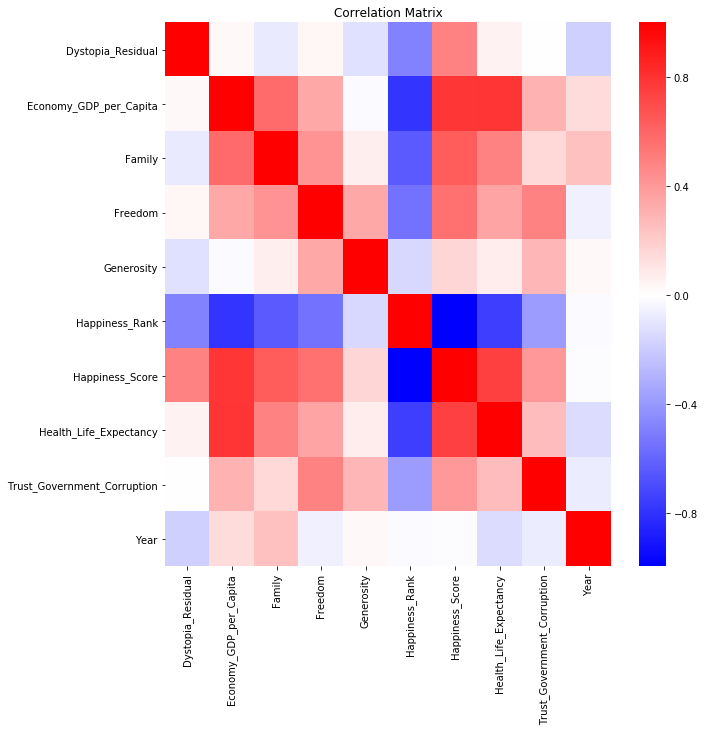

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Matrix, cmap='bwr')
plt.title('Correlation Matrix')

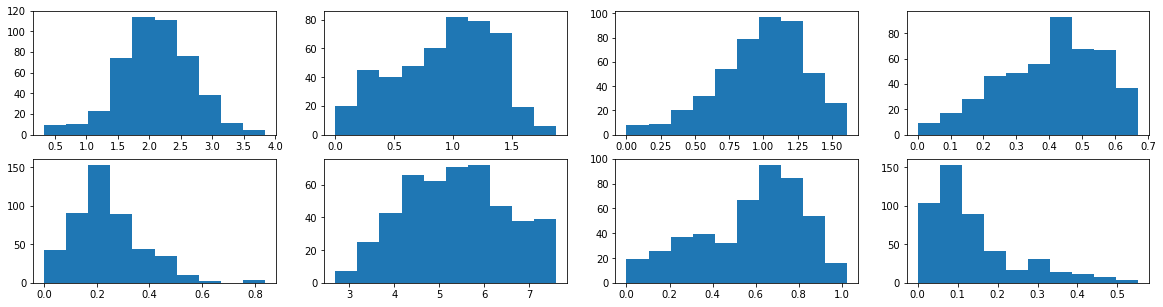

In [124]:
plt.figure(figsize=(20,5))   #listeyi numaralandirilarak dongu yaptik

baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }


graph_by_eight_variable = ['Dystopia_Residual', 'Economy_GDP_per_Capita', 'Family', 'Freedom',
               'Generosity', 'Happiness_Score', 'Health_Life_Expectancy', 'Trust_Government_Corruption'] 

for indeks, degisken in enumerate(graph_by_eight_variable):
    plt.subplot(2, 4, indeks+1) #il deger 0 oldugu icin onu bir paymak icin +1 koyduk #liste numaralari kullanildi
    plt.hist(Happiness_report2[degisken])


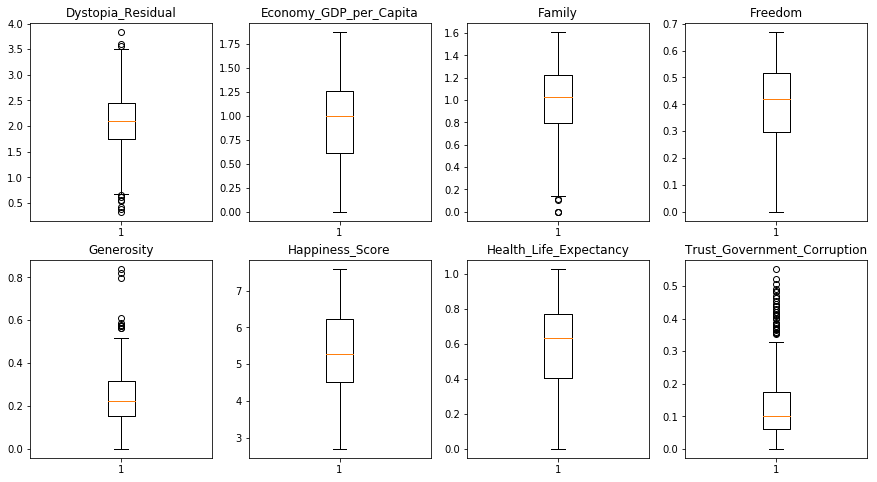

In [130]:
graph_by_eight_variables = ['Dystopia_Residual', 'Economy_GDP_per_Capita', 'Family', 'Freedom',
               'Generosity', 'Happiness_Score', 'Health_Life_Expectancy', 'Trust_Government_Corruption'] 
plt.figure(figsize=(15,8))

for i in range(0,8):
    plt.subplot(2, 4, i+1)
    plt.boxplot(Happiness_report2[graph_by_eight_variables[i]])
    plt.title(graph_by_eight_variables[i])
    
    
    

In [60]:
from scipy.stats.mstats import winsorize

Happiness_report2["winsorize_Dystopia_Residual"] = winsorize(Happiness_report2["Dystopia_Residual"], (0, 0.10))

In [61]:
from scipy.stats.mstats import winsorize

Happiness_report2["winsorize_Dystopia_Residual"] = winsorize(Happiness_report2["Dystopia_Residual"], (0, 0.10))
Happiness_report2["winsorize_Economy_GDP_per_Capita"] = winsorize(Happiness_report2["Economy_GDP_per_Capita"], (0, 0.10))
Happiness_report2["winsorize_Family"] = winsorize(Happiness_report2["Family"], (0, 0.10))
Happiness_report2["winsorize_Freedom"] = winsorize(Happiness_report2["Freedom"], (0, 0.10))
Happiness_report2["winsorize_Generosity"] = winsorize(Happiness_report2["Generosity"], (0, 0.10))
Happiness_report2["winsorize_Happiness_Rank"] = winsorize(Happiness_report2["Happiness_Rank"], (0, 0.10))
Happiness_report2["winsorize_Happiness_Score"] = winsorize(Happiness_report2["Happiness_Score"], (0, 0.10))
Happiness_report2["winsorize_Health_Life_Expectancy"] = winsorize(Happiness_report2["Health_Life_Expectancy"], (0, 0.10))
Happiness_report2["winsorize_Trust_Government_Corruption"] = winsorize(Happiness_report2["Trust_Government_Corruption"], (0, 0.10))

# Normallestirme

In [62]:
from sklearn.preprocessing import normalize

Happiness_report2["winsorize_Economy_GDP_per_Capita"] = normalize(np.array(Happiness_report2["Economy_GDP_per_Capita"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Dystopia_Residual"] = normalize(np.array(Happiness_report2["winsorize_Dystopia_Residual"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Family"] =  normalize(np.array(Happiness_report2["winsorize_Family"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Freedom"] =  normalize(np.array(Happiness_report2["winsorize_Freedom"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Generosity"] =  normalize(np.array(Happiness_report2["winsorize_Generosity"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Happiness_Rank"] =  normalize(np.array(Happiness_report2["winsorize_Happiness_Rank"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Happiness_Score"] =  normalize(np.array(Happiness_report2["winsorize_Happiness_Score"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Health_Life_Expectancy"] =  normalize(np.array(Happiness_report2["winsorize_Health_Life_Expectancy"]).reshape(1,-1)).reshape(-1,1)
Happiness_report2["winsorize_Trust_Government_Corruption"] =  normalize(np.array(Happiness_report2["winsorize_Trust_Government_Corruption"]).reshape(1,-1)).reshape(-1,1)



# PCA 

In [63]:
df1 = Happiness_report2[['winsorize_Dystopia_Residual','winsorize_Economy_GDP_per_Capita',
       'winsorize_Family','winsorize_Freedom', 'winsorize_Generosity','winsorize_Happiness_Score',
       'winsorize_Health_Life_Expectancy', 'winsorize_Trust_Government_Corruption']]


In [64]:
Happiness_report2["winsorize_Dystopia_Residual"].head()

0    0.054533
1    0.058533
2    0.053984
3    0.053405
4    0.053111
Name: winsorize_Dystopia_Residual, dtype: float64

In [65]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pc = pca.fit_transform(df1)
print (pca.explained_variance_ratio_)

[0.44293498 0.23121467]
